In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import scipy.sparse
import scanpy as sc
import re
import gseapy as gp
from gseapy import dotplot
from adjustText import adjust_text  
import warnings
import anndata as ad
import pickle
from scipy.stats import pearsonr, spearmanr

In [8]:
def extract_prefix(gene):
    if isinstance(gene, str):  # Ensure it's a string
        match = re.match(r"([A-Za-z]+)", gene)
        return match.group(1) if match else None
    return None  # Return None for non-string values

def find_common_genes(list1, list2):
    # Extract prefixes, ensuring None values are ignored
    prefixes1 = {gene: extract_prefix(gene) for gene in list1 if isinstance(gene, str)}
    prefixes2 = {gene: extract_prefix(gene) for gene in list2 if isinstance(gene, str)}
    
    # Find common prefixes
    common_prefixes = set(prefixes1.values()) & set(prefixes2.values()) - {None}
    
    # Return genes with common prefixes
    common_genes = [gene for gene, prefix in prefixes1.items() if prefix in common_prefixes] + \
                   [gene for gene, prefix in prefixes2.items() if prefix in common_prefixes]
    
    return common_genes


def find_common_gene_pairs(list1, list2):
    # Extract prefixes, ensuring None values are ignored
    prefixes1 = {gene: extract_prefix(gene) for gene in list1 if isinstance(gene, str)}
    prefixes2 = {gene: extract_prefix(gene) for gene in list2 if isinstance(gene, str)}
    
    # Find common prefixes
    common_prefixes = set(prefixes1.values()) & set(prefixes2.values()) - {None}
    
    # Create pairs of matching genes
    gene_pairs = [(gene1, gene2) 
                  for gene1, prefix1 in prefixes1.items() 
                  for gene2, prefix2 in prefixes2.items()
                  if prefix1 == prefix2 and prefix1 in common_prefixes]
    
    # Convert to DataFrame
    df = pd.DataFrame(gene_pairs, columns=["List1_Gene", "List2_Gene"])
    
    return df


# Literature Comparison

## MEYER

In [10]:
meyer_adata=ad.read_h5ad('./Data/adata_for_stats')

In [11]:
meyer_all_detected_prots=meyer_adata.to_df().columns.to_list()

In [12]:
def remove_dash_number_suffix(strings):
    return [re.sub(r'-\d+$', '', s) for s in strings]

In [13]:
meyer_all_detected_prots=remove_dash_number_suffix(meyer_all_detected_prots)

In [14]:
len(meyer_all_detected_prots) 

9518

In [48]:
meyer_all_detected_prots

['SEPTIN7',
 'MISP3',
 'UBXN8',
 'SRCIN1',
 'NSMCE2',
 'PSMB3',
 'UHRF1',
 'PSMB2',
 'MPC1',
 'LRMDA',
 'PRDM11',
 'ESF1',
 'TAP2',
 'RAVER1',
 'CYFIP1',
 'NOL4L',
 'HUWE1',
 'COG8',
 'SMIM26',
 'AAK1',
 'CD99',
 'PHF20L1',
 'SCLY',
 'MYO10',
 'VDAC2',
 'MYEF2',
 'FADS1',
 'PLEKHB2',
 'CADM1',
 'RNF213',
 'ACSS3',
 'NAA15',
 'ZNF334',
 'RPS15',
 'PIGBOS1',
 'KDM4B',
 'ING1',
 'GPRC5C',
 'CES3',
 'RPSA',
 'PVR',
 'DDX46',
 'PPA2',
 'DDX3X',
 'HADH',
 'HLA-F',
 'ALDH3A2',
 'SYNJ1',
 'HLA-C',
 'RPP21',
 'BAG6',
 'VARS2',
 'PKLR',
 'HLA-C',
 'C4A',
 'MARVELD2',
 'ARHGAP27',
 'PON2',
 'PON2',
 'TRIM47',
 'PROS1',
 'SH3D19',
 'DST',
 'ERVK3',
 'RABGAP1L',
 'SEC24C',
 'DOCK7',
 'PTBP1',
 'COBLL1',
 'DHX16',
 'HLA-C',
 'HLA-A',
 'MICB',
 'WDR46',
 'HLA-C',
 'DDX39B',
 'VARS2',
 'LSM14A',
 'C20orf204',
 'RAB11FIP5',
 'PXN',
 'EPB41L1',
 'DNMBP',
 'RALGAPA1',
 'GSE1',
 'UNC13B',
 'CACNB4',
 'FTO',
 'FARP1',
 'TEPSIN',
 'LIN28B',
 'KRT10',
 'FAM193A',
 'PLEKHA6',
 'DPY19L1',
 'ABHD14A-ACY1',
 'HL

## RYU

In [49]:
# Load the Excel file from Ryu et al publication 
file_path = 'Data/41598_2017_7757_MOESM2_ESM.xlsx'  
ryu_df = pd.read_excel(file_path)

# Select only the relevant columns and set the index to 'Gene'
ryu_df= ryu_df[['Gene', 'PSvsUT.log2FC', 'PSvsUT.FDR']].set_index('Gene')

print(ryu_df)

        PSvsUT.log2FC    PSvsUT.FDR
Gene                               
F2RL1        1.328326  2.860000e-15
THBS1        0.843850  3.580000e-13
IGFBP3      -1.201711  9.980000e-09
KRT23        0.867676  3.710000e-08
AKAP12       0.933022  3.710000e-08
...               ...           ...
NaN         -0.012569           NaN
NaN          0.266035           NaN
NaN          0.038709           NaN
NaN               NaN           NaN
NaN               NaN           NaN

[57905 rows x 2 columns]


/home/csmova/anaconda3/envs/hepg2_abc/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [50]:
ryu_df = ryu_df.dropna()
ryu_df

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
F2RL1,1.328326,2.860000e-15
THBS1,0.843850,3.580000e-13
IGFBP3,-1.201711,9.980000e-09
KRT23,0.867676,3.710000e-08
AKAP12,0.933022,3.710000e-08
...,...,...
TAP1,-0.000238,9.993569e-01
MAP3K2,0.000203,9.993569e-01
MFSD5,0.000154,9.993569e-01


In [51]:
#drop rows with nan in index; i.e., no uniprot ID
ryu_df = ryu_df[~ryu_df.index.isna()]
ryu_df

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
F2RL1,1.328326,2.860000e-15
THBS1,0.843850,3.580000e-13
IGFBP3,-1.201711,9.980000e-09
KRT23,0.867676,3.710000e-08
AKAP12,0.933022,3.710000e-08
...,...,...
TAP1,-0.000238,9.993569e-01
MAP3K2,0.000203,9.993569e-01
MFSD5,0.000154,9.993569e-01


In [52]:
ryu_df_sig=ryu_df[ryu_df['PSvsUT.FDR']<0.1]
ryu_df_sig

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
F2RL1,1.328326,2.860000e-15
THBS1,0.843850,3.580000e-13
IGFBP3,-1.201711,9.980000e-09
KRT23,0.867676,3.710000e-08
AKAP12,0.933022,3.710000e-08
...,...,...
GRPEL1,0.246162,9.630021e-02
VIMP,0.259472,9.630021e-02
IRS1,-0.347935,9.630021e-02


In [53]:
ryu_df_sig_up=ryu_df_sig[ryu_df_sig['PSvsUT.log2FC']>0]
ryu_df_sig_up
#note this is PenStrep versus Untreated; so, upregulated in A (in terms of our work)

ryu_df_sig_down=ryu_df_sig[ryu_df_sig['PSvsUT.log2FC']<0]
ryu_df_sig_down

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
IGFBP3,-1.201711,9.980000e-09
GCNT1,-0.953332,6.170000e-05
PCK1,-0.727411,1.105910e-04
G6PC,-0.812293,1.864630e-04
TNFSF10,-0.647648,1.074030e-03
ACSM3,-0.428931,2.755331e-03
EGLN3,-0.760217,4.477199e-03
FBLN5,-0.809220,4.971799e-03
CYP4F3,-0.549638,4.971799e-03


In [54]:
print((ryu_df_sig_up.index.to_list()))


['F2RL1', 'THBS1', 'KRT23', 'AKAP12', 'TRIB1', 'GOT1', 'NME1', 'ACSL1', 'JAG1', 'ODC1', 'AGPAT9', 'SDC4', 'MAP1B', 'MAP1LC3B', 'IGFBP1', 'PFDN2', 'RCN1', 'ANTXR2', 'LGALS3', 'MCL1', 'PLIN2', 'SLC6A14', 'PRNP', 'FLRT3', 'ATF3', 'KIAA1199', 'ABCB1', 'ZFP36L1', 'TNFRSF21', 'ITGA2', 'MANF', 'LRRC59', 'CD55', 'OSMR', 'SOX4', 'HSPH1', 'CIRH1A', 'SPRY4', 'DUSP6', 'UBASH3B', 'WARS', 'GART', 'YWHAH', 'MXD1', 'NEDD9', 'RBM24', 'WDR77', 'LURAP1L', 'RCL1', 'EIF2B2', 'CYCS', 'PALLD', 'SLC20A1', 'OSBPL10', 'SAT1', 'AVPI1', 'STX3', 'GCLM', 'PAK1IP1', 'SRGAP1', 'HK2', 'CTPS1', 'RPF2', 'MBNL2', 'PSME3', 'DKC1', 'MAK16', 'TUBE1', 'PPP2CB', 'BAZ1A', 'ARRDC4', 'YARS', 'TRNP1', 'BAG2', 'IFRD1', 'KLF6', 'FILIP1L', 'PTRH2', 'RNF10', 'TMEM2', 'PSMD11', 'XPO5', 'HSPA9', 'TOP1', 'CPEB4', 'GRPEL2', 'SH2B3', 'STC2', 'DNAJA1', 'SRPRB', 'BTG2', 'GCLC', 'HBEGF', 'SMIM13', 'JMJD6', 'EZR', 'MT-ND3', 'MOCOS', 'C21orf59', 'SLC7A11', 'RAE1', 'PRPF38B', 'MTHFD2', 'TARS', 'MTHFD1L', 'UTP15', 'ACSL5', 'NSUN2', 'HSPA5', 'GTF

In [55]:
print((ryu_df_sig_down).index.to_list())

['IGFBP3', 'GCNT1', 'PCK1', 'G6PC', 'TNFSF10', 'ACSM3', 'EGLN3', 'FBLN5', 'CYP4F3', 'PECR', 'HMGCS2', 'SLC6A4', 'CYP7A1', 'FAXDC2', 'SGK1', 'MMP11', 'CYP8B1', 'SMLR1', 'PRLR', 'ZKSCAN1', 'DDC', 'TMEM37', 'ABCC6P1', 'FOXO4', 'SMIM14', 'SLC39A4', 'FOS', 'CIRBP', 'AGTR1', 'SLC38A4', 'NDRG1', 'DEPTOR', 'TRAF3IP2', 'MYOM3', 'BDH1', 'CD9', 'CHDH', 'SLC22A7', 'OSBP2', 'RGN', 'SPTLC3', 'PTPRN2', 'ISM2', 'ATP2B2', 'SMPDL3A', 'KNG1', 'C6orf89', 'CDH1', 'AMDHD1', 'IRS1', 'PLA2G12B']


In [56]:
print(len(ryu_df_sig_up))
print(len(ryu_df_sig_down))

155
51


In [57]:
ryu_meyer_set=[]
for prot in ryu_df.index.to_list():
    if prot in meyer_all_detected_prots:
        ryu_meyer_set.append(prot)

In [58]:
len(ryu_meyer_set)

7503

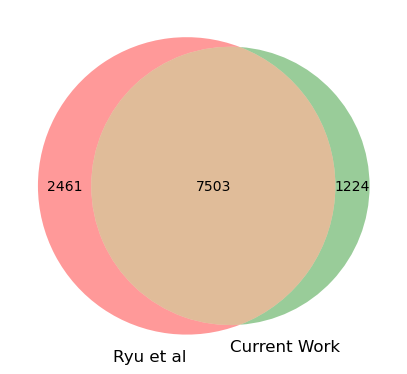

In [59]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert lists to sets
set1 = set(ryu_df.index.to_list())
set2 = set(meyer_all_detected_prots)

# Create Venn diagram
plt.figure(figsize=(5,5))
venn2([set1, set2], set_labels=('Ryu et al', 'Current Work'))
plt.show()

In [1]:
meyer_upN_01_cutoff_0coef=['AASS',
 'ABAT',
 'ABCB1',
 'ABL2',
 'ACACA',
 'ACOT2',
 'ACOX1-1',
 'ACSL3',
 'ADIPOR1',
 'AGR2',
 'AGXT',
 'AK1',
 'AKR1B10',
 'ALCAM',
 'ALDH18A1',
 'ALDH1A1',
 'ALDH1L2',
 'ALDH4A1-1',
 'AMPD2',
 'ANPEP',
 'APOE',
 'ARHGEF2',
 'ASRGL1',
 'ATAD2',
 'ATP6V0A1',
 'BOP1',
 'BRD2',
 'BRIX1',
 'BRWD1',
 'CANX-1',
 'CES1',
 'CES2',
 'CHD6',
 'CHRAC1',
 'CKAP4',
 'CLGN',
 'CLU',
 'CMBL',
 'COG6',
 'DAB2IP',
 'DDX17-2',
 'DDX27',
 'DDX47',
 'DDX52',
 'DDX54-1',
 'DDX56',
 'DGAT1',
 'DNAJC3',
 'DPP4',
 'DSG2',
 'EDEM3',
 'EIF6',
 'ERAP1',
 'ERLEC1',
 'FABP1',
 'FAM169A',
 'FAM241A',
 'FAM3C',
 'FARP1-1',
 'FASN',
 'FBL',
 'FDPS',
 'FGB',
 'FKBP14',
 'FN1',
 'GFPT1',
 'GLUD1',
 'GMDS',
 'GNS',
 'GPHN',
 'GPR107-1',
 'GPX2',
 'GSTA2',
 'H2BC21',
 'H2BC5',
 'HEATR6',
 'HEXA',
 'HNRNPR',
 'HNRNPUL2',
 'HSD17B12',
 'HSP90B1',
 'HYOU1-1',
 'IKBIP-1',
 'ILF3',
 'IMMT',
 'ITIH2',
 'ITPRID2',
 'JUP',
 'KDM4A',
 'KLHL14',
 'LMNA',
 'LONP1',
 'LRRFIP2',
 'MAT2A',
 'MATR3',
 'MESD',
 'MOGS',
 'MPHOSPH6',
 'MTDH-2',
 'MTRES1',
 'MTTP',
 'MYO1A-1',
 'MYO1B-2',
 'MYO1D',
 'NAT10',
 'NDUFA12',
 'NDUFA13',
 'NDUFB4',
 'NEDD4L',
 'NIFK',
 'NMRK1',
 'NOP56',
 'NOP9',
 'NPC1',
 'NPTN',
 'NSA2',
 'NSMCE1',
 'NUP54',
 'P4HB-3',
 'PARP1',
 'PDCD11',
 'PDIA2',
 'PDIA4',
 'PDIA5',
 'PDZD11',
 'PECR',
 'PGM1',
 'PGRMC2',
 'PIK3AP1',
 'PIPOX',
 'PKLR-1',
 'POR',
 'PPIB',
 'PROS1',
 'PSPH',
 'PTMS',
 'PUM3',
 'RAB17',
 'RAB22A',
 'RAB2B',
 'RALY',
 'RBM22',
 'RBM28-1',
 'RBMX-1',
 'RBMXL1',
 'RGN',
 'RNF149',
 'RPF2',
 'RPL7L1',
 'RRPsec1',
 'RRP8',
 'RRP9',
 'RSL1D1',
 'RSL24D1',
 'SDCBP-1',
 'SEC11C',
 'SEC31A',
 'SEC61B',
 'SFXN1',
 'SFXN3',
 'SIN3A',
 'SLC39A10',
 'SLC39A14',
 'SLC39A4',
 'SLCO4C1',
 'SMU1',
 'SNRPA',
 'SOAT2',
 'SORBS1-2',
 'SORD',
 'SRFBP1',
 'SRP54',
 'SRPRB-1',
 'SRSF1',
 'SRSF10',
 'SRSF9',
 'SSR1',
 'SSR4',
 'STOM',
 'SUPT16H',
 'SUPT3H',
 'SUPT5H-1',
 'SUPT6H',
 'SYNJ2BP',
 'TBL3',
 'TFRC',
 'TGFBR2',
 'TIMP3',
 'TKFC',
 'TOP2B',
 'TP53BP1',
 'TPD52L2-2',
 'TRA2A',
 'TRA2B',
 'TSPAN3',
 'TXNDC11',
 'UBAC1',
 'UBFD1',
 'UFL1',
 'UGT2B7',
 'UTP14A',
 'UTP15',
 'UTP4-1',
 'UTP6',
 'VCP-3',
 'WDR3',
 'WDR36',
 'WDR43']

In [2]:
meyer_downN_01_cutoff_0coef=['ABHD4',
 'ACTG2',
 'ACTR1A',
 'ADCY9',
 'AIF1L',
 'AK1',
 'AKAP12',
 'ALPL',
 'ANKRD1',
 'ANXA3',
 'ANXA4-1',
 'APOB',
 'APOBEC3C',
 'ARHGAP29',
 'ARL6IP4',
 'ASMTL',
 'ATR',
 'BAG2',
 'BCCIP-1',
 'CACYBP',
 'CAVIN1',
 'CAVIN2',
 'CDK16',
 'CHST3',
 'CISD1',
 'CKB',
 'CMBL',
 'CORO2A',
 'COX19',
 'CPLX2',
 'CPQ',
 'CPT1A',
 'CPVL',
 'CRIP2',
 'CRLF1',
 'CTNNA1',
 'CTSC',
 'CTSD-1',
 'CTSH',
 'CTSL',
 'CWF19L2',
 'DCP1B',
 'DDX3X',
 'DLG3',
 'DNAJC13',
 'DNM2',
 'ECT2',
 'EEF1B2',
 'EIF2AK4',
 'EIF4H',
 'ENAH-2',
 'ERF',
 'EVPL',
 'EXOC5',
 'FAM107B',
 'FAM241A',
 'FARP1-1',
 'FSCN1',
 'FUCA2',
 'FXR1-1',
 'GCAT',
 'GLA',
 'GNS',
 'GPC1',
 'GPHN',
 'HEBP1',
 'HEXA',
 'HEXB',
 'HEXB-1',
 'HMOX1',
 'HPD',
 'HSPB1',
 'IFI30',
 'IFI35',
 'IGFBP1',
 'IL18',
 'INPP5F',
 'ISCA1',
 'ITGAV',
 'KANSL1',
 'KDM1A',
 'KIF15',
 'KIF2A',
 'KRT19-1',
 'KRT23',
 'KRT80',
 'L1CAM',
 'LONP2',
 'LRRC20',
 'MAGED1',
 'MANBA',
 'MAPRE1',
 'METTL5',
 'MGA',
 'MICU2',
 'MRS2',
 'MTUS1',
 'NAGA',
 'NAGLU',
 'NDUFAF1',
 'NDUFV3',
 'NEDD4L',
 'NES',
 'NEU1',
 'NHSL1-1',
 'NME3',
 'NME4',
 'NOTUM',
 'NR3C1',
 'NUP155',
 'OXLD1',
 'PARP4',
 'PAWR',
 'PCBP2',
 'PET100',
 'PFKP',
 'PGS1',
 'PHACTR2-1',
 'PI4K2A',
 'PLA2G15',
 'PLIN2',
 'PLOD3',
 'PLXND1',
 'PMM1',
 'PPIP5K1',
 'PPL',
 'PPP1R2',
 'PYGB',
 'RABEP1',
 'RARA',
 'RB1',
 'RIF1',
 'RPAP2',
 'RPL10A',
 'RPL22L1',
 'RPL27',
 'RPS14',
 'RPS20',
 'RRN3',
 'SDCBP-1',
 'SEMA3B',
 'SESTD1',
 'SFT2D2',
 'SLC3A2',
 'SMCR8',
 'SMG7',
 'SMPD1',
 'STAT6',
 'STEAP3',
 'SUPT3H',
 'TAGLN2',
 'TANGO6',
 'TATDN2',
 'TAX1BP3',
 'TGM2',
 'TGOLN2-2',
 'THNSL1',
 'TIMELESS',
 'TIMM8B',
 'TMED1',
 'TMOD2',
 'TMX2',
 'TP53BP1',
 'TP53RK',
 'TPM1-1',
 'TPP1',
 'TSEN34',
 'TSPAN3',
 'UBAP2L',
 'VAT1',
 'VCP-3',
 'VSIG10L',
 'WDHD1',
 'ZFAND3',
 'ZNF281']

In [62]:
def find_letter_prefix_matches(list1, list2):
    # Helper function to extract letter prefix before first digit
    def extract_prefix(s):
        match = re.match(r"([a-zA-Z]+)", s)
        return match.group(1).lower() if match else None

    matches = []
    for item1 in list1:
        prefix1 = extract_prefix(item1)
        if not prefix1:
            continue
        for item2 in list2:
            prefix2 = extract_prefix(item2)
            if prefix1 == prefix2:
                matches.append({
                    'List1': item1,
                    'List2': item2,
                    'SharedPrefix': prefix1
                })
    
    return pd.DataFrame(matches)

In [63]:
ryu_all_sig=(ryu_df_sig_down).index.to_list()+(ryu_df_sig_up).index.to_list()
meyer_all_sig=meyer_upN_01_cutoff_0coef+meyer_downN_01_cutoff_0coef

In [64]:
ryu_meyer_matches= find_letter_prefix_matches(ryu_all_sig, meyer_all_sig)
print(set(ryu_meyer_matches['SharedPrefix'].to_list()))

{'rpf', 'pecr', 'rgn', 'acsl', 'slc', 'abat', 'rnf', 'ak', 'srprb', 'bag', 'rbm', 'atp', 'utp', 'nme', 'igfbp', 'abcb', 'krt', 'top', 'nedd', 'lrrc', 'pla', 'akap', 'ppp', 'plin', 'wdr', 'eif'}


In [65]:
meyer_upN_01_cutoff_0coef=remove_dash_number_suffix(meyer_upN_01_cutoff_0coef)
meyer_downN_01_cutoff_0coef=remove_dash_number_suffix(meyer_downN_01_cutoff_0coef)

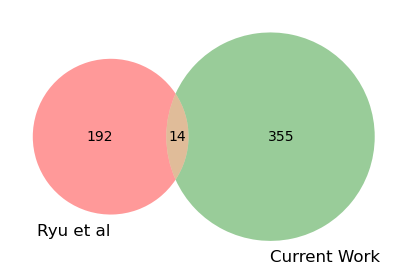

In [66]:
# Convert lists to sets
set1 = set(ryu_df_sig.index.to_list()) 
#set2 = set(meyer_lme4_downreg+meyer_lme4_upreg) #todo:make sure this is all reg proteins, not just 1 condition
set2=set(meyer_upN_01_cutoff_0coef+meyer_downN_01_cutoff_0coef)

# Create Venn diagram
plt.figure(figsize=(5,5))
venn2([set1, set2], set_labels=('Ryu et al', 'Current Work'))
plt.show()

In [67]:
for prot in ['SLC39A4', 'ABAT', 'AKAP12', 'SRPRB', 'RGN', 'RPF2', 'PLIN2', 'UTP14A', 'IGFBP1', 'ABCB1', 'UTP15', 'BAG2', 'PECR', 'KRT23']:
    if prot in meyer_upN_01_cutoff_0coef:
        print(prot + ' upregulated in N in Meyer')
    if prot in meyer_downN_01_cutoff_0coef:
        print(prot + ' downregulated in N in Meyer') 
        
for prot in ['SLC39A4', 'ABAT', 'AKAP12', 'SRPRB', 'RGN', 'RPF2', 'PLIN2', 'UTP14A', 'IGFBP1', 'ABCB1', 'UTP15', 'BAG2', 'PECR', 'KRT23']: 
    if prot in ryu_df_sig_up.index.to_list():
        print(prot + ' up in Ryu') 
    if prot in ryu_df_sig_down.index.to_list():
        print(prot + ' down in Ryu') 

SLC39A4 upregulated in N in Meyer
ABAT upregulated in N in Meyer
AKAP12 downregulated in N in Meyer
SRPRB upregulated in N in Meyer
RGN upregulated in N in Meyer
RPF2 upregulated in N in Meyer
PLIN2 downregulated in N in Meyer
UTP14A upregulated in N in Meyer
IGFBP1 downregulated in N in Meyer
ABCB1 upregulated in N in Meyer
UTP15 upregulated in N in Meyer
BAG2 downregulated in N in Meyer
PECR upregulated in N in Meyer
KRT23 downregulated in N in Meyer
SLC39A4 down in Ryu
ABAT up in Ryu
AKAP12 up in Ryu
SRPRB up in Ryu
RGN down in Ryu
RPF2 up in Ryu
PLIN2 up in Ryu
UTP14A up in Ryu
IGFBP1 up in Ryu
ABCB1 up in Ryu
UTP15 up in Ryu
BAG2 up in Ryu
PECR down in Ryu
KRT23 up in Ryu


In [68]:
#PASSAGE 1 v RYU
import pickle
with open("./Data/t_test_AN_passage6_06052025.pkl", "rb") as f:
    ttest_AN_passage1 = pickle.load(f)

In [69]:
ttest_AN_passage1.protein

2473       FAS
5075     SCYL2
1913       RB1
2601      TSPO
1928     ITGAV
         ...  
6349    RNF138
6179      UBA3
1525    TM7SF2
7362    ATG101
2139     IFI30
Name: protein, Length: 9518, dtype: object

In [70]:
cleaned_index=remove_dash_number_suffix(ttest_AN_passage1.protein.to_list())

In [71]:
ttest_AN_passage1.protein=cleaned_index

In [72]:
ttest_AN_passage1

,protein,passage,p_value,log2_fc,adj_p_value
2473,FAS,6,0.000039,-0.696252,0.236085
5075,SCYL2,6,0.000053,1.353615,0.236085
1913,RB1,6,0.000081,0.765499,0.236085
2601,TSPO,6,0.000099,1.196301,0.236085
1928,ITGAV,6,0.000159,0.701149,0.302702
...,...,...,...,...,...
6349,RNF138,6,0.999127,0.000221,0.999547
6179,UBA3,6,0.999337,-0.000644,0.999618
1525,TM7SF2,6,0.999504,0.000569,0.999618
7362,ATG101,6,0.999513,-0.000122,0.999618


In [73]:
# Perform an inner join, keeping only matching rows
merged_df = ryu_df.rename_axis('Gene').reset_index().merge(
    ttest_AN_passage1.rename(columns={'protein': 'Gene'}),
    on='Gene',
    how='inner'
)

# Keep only relevant columns
merged_df = merged_df[['Gene', 'PSvsUT.log2FC', 'log2_fc']]

merged_df

,Gene,PSvsUT.log2FC,log2_fc
0,F2RL1,1.328326,0.933302
1,THBS1,0.843850,0.197579
2,KRT23,0.867676,0.338710
3,AKAP12,0.933022,0.199017
4,GOT1,0.525081,-0.458338
...,...,...,...
8229,GIT2,0.000186,0.529742
8230,TAP1,-0.000238,0.339549
8231,MAP3K2,0.000203,0.451894
8232,MFSD5,0.000154,0.635246


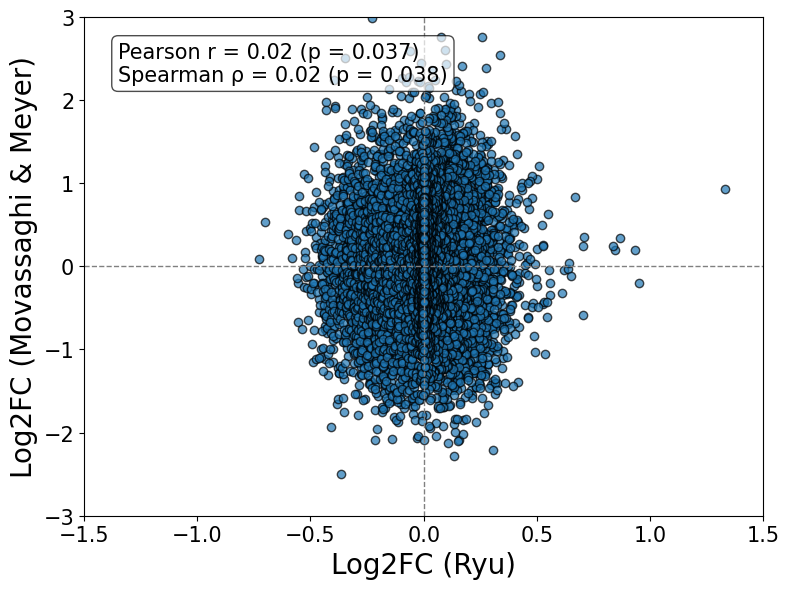

In [76]:
# Extract log2FC values
x_values = merged_df['PSvsUT.log2FC']
y_values = merged_df['log2_fc']

# Calculate correlations
pearson_corr, pearson_p = pearsonr(x_values, y_values)
spearman_corr, spearman_p = spearmanr(x_values, y_values)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.7, edgecolors='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Log2FC (Ryu)',fontsize=20)
plt.ylabel('Log2FC (Movassaghi & Meyer)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylim([-3,3])
plt.xlim([-1.5,1.5])
# Annotate with correlation coefficients
plt.text(0.05, 0.95,
         f'Pearson r = {pearson_corr:.2f} (p = {pearson_p:.2g})\nSpearman ρ = {spearman_corr:.2f} (p = {spearman_p:.2g})',
         transform=plt.gca().transAxes,
         fontsize=15,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.grid(False)
plt.tight_layout()
plt.show()


In [102]:
#PASSAGE 2 v RYU

In [103]:
with open("./Data/t_test_AN_passage2_03032025.pkl", "rb") as f:
    ttest_AN_passage2 = pickle.load(f)

In [104]:
ttest_AN_passage2

,protein,passage,p_value,log2_fc,adj_p_value
393,BDP1,2,2.425755e-08,1.931903,0.000230
2218,SLC25A16,2,1.090829e-04,-1.485962,0.415669
1678,STAMBP,2,1.312501e-04,-1.173503,0.415669
7582,NIFK,2,3.018407e-04,1.184169,0.573558
9480,MAU2,2,2.973879e-04,-2.129857,0.573558
...,...,...,...,...,...
4041,RAPGEF1,2,9.958473e-01,-0.002165,0.999905
1709,CRYZL1,2,9.964682e-01,-0.003457,0.999905
3231,NR1H2,2,9.989167e-01,-0.001086,0.999905
5774,RDH10,2,9.972114e-01,-0.002305,0.999905


In [105]:
cleaned_index=remove_dash_number_suffix(ttest_AN_passage2.protein.to_list())
ttest_AN_passage2.protein=cleaned_index

In [106]:
import pandas as pd

# Perform an inner join, keeping only matching rows
merged_df = ryu_df.rename_axis('Gene').reset_index().merge(
    ttest_AN_passage2.rename(columns={'protein': 'Gene'}),
    on='Gene',
    how='inner'
)

# Keep only relevant columns
merged_df = merged_df[['Gene', 'PSvsUT.log2FC', 'log2_fc']]

merged_df

,Gene,PSvsUT.log2FC,log2_fc
0,F2RL1,1.328326,-0.473792
1,THBS1,0.843850,0.180800
2,KRT23,0.867676,-0.266305
3,AKAP12,0.933022,-0.232623
4,GOT1,0.525081,0.526148
...,...,...,...
8215,GIT2,0.000186,0.010832
8216,TAP1,-0.000238,-0.835261
8217,MAP3K2,0.000203,0.165991
8218,MFSD5,0.000154,0.217526


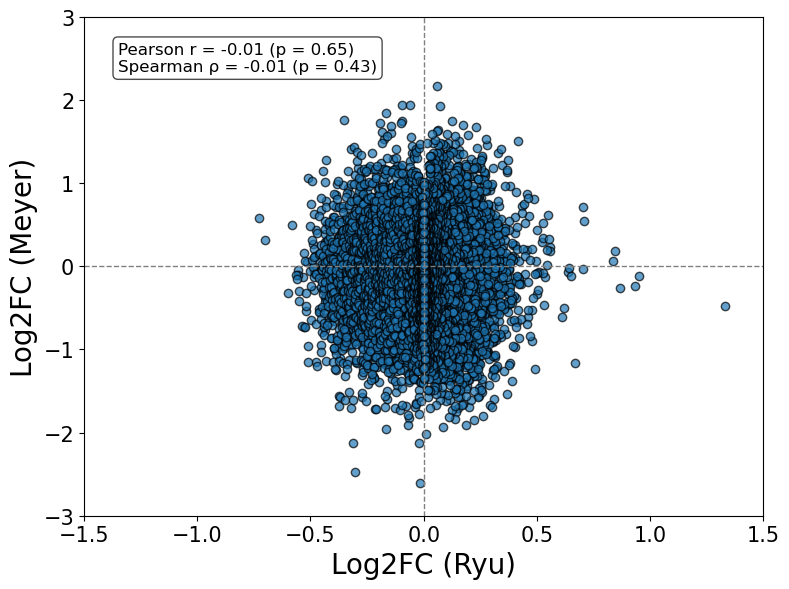

In [107]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Extract log2FC values
x_values = merged_df['PSvsUT.log2FC']
y_values = merged_df['log2_fc']

# Calculate correlations
pearson_corr, pearson_p = pearsonr(x_values, y_values)
spearman_corr, spearman_p = spearmanr(x_values, y_values)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.7, edgecolors='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Log2FC (Ryu)',fontsize=20)
plt.ylabel('Log2FC (Meyer)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylim([-3,3])
plt.xlim([-1.5,1.5])
# Annotate with correlation coefficients
plt.text(0.05, 0.95,
         f'Pearson r = {pearson_corr:.2f} (p = {pearson_p:.2g})\nSpearman ρ = {spearman_corr:.2f} (p = {spearman_p:.2g})',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.grid(False)
plt.tight_layout()
plt.show()


In [7]:
ryu_df_sig_fc=ryu_df[ryu_df['PSvsUT.log2FC']<-0.5]
ryu_df_sig_fc[ryu_df_sig_fc['PSvsUT.FDR']<0.1]

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
IGFBP3,-1.201711,9.980000e-09
GCNT1,-0.953332,6.170000e-05
PCK1,-0.727411,1.105910e-04
G6PC,-0.812293,1.864630e-04
TNFSF10,-0.647648,1.074030e-03
EGLN3,-0.760217,4.477199e-03
FBLN5,-0.809220,4.971799e-03
CYP4F3,-0.549638,4.971799e-03
HMGCS2,-0.674284,9.998534e-03


In [8]:
ryu_df_sig_fc=ryu_df[ryu_df['PSvsUT.log2FC']>0.5]
ryu_df_sig_fc[ryu_df_sig_fc['PSvsUT.FDR']<0.1]

,PSvsUT.log2FC,PSvsUT.FDR
Gene,,
F2RL1,1.328326,2.860000e-15
THBS1,0.843850,3.580000e-13
KRT23,0.867676,3.710000e-08
AKAP12,0.933022,3.710000e-08
TRIB1,0.686196,3.710000e-08
GOT1,0.525081,5.710000e-08
NME1,0.535609,1.240000e-07
ACSL1,0.544791,1.370000e-07
NaN,1.188256,3.500000e-07


In [348]:
ryu_df_fdr.index.to_list()

['F2RL1',
 'THBS1',
 'IGFBP3',
 'KRT23',
 'AKAP12',
 'TRIB1',
 'GOT1',
 'NME1',
 'ACSL1',
 nan,
 'JAG1',
 'ODC1',
 'AGPAT9',
 'SDC4',
 'MAP1B',
 'MAP1LC3B',
 'IGFBP1',
 'PFDN2',
 'RCN1',
 'ANTXR2',
 'LGALS3',
 'MCL1',
 'PLIN2',
 'SLC6A14',
 'GCNT1',
 'PRNP',
 'PCK1',
 'FLRT3',
 'G6PC',
 'ATF3',
 'KIAA1199',
 'ABCB1',
 'ZFP36L1',
 'TNFRSF21',
 'ITGA2',
 'MANF',
 'LRRC59',
 'TNFSF10',
 'CD55',
 'OSMR',
 'ACSM3',
 'SOX4',
 'HSPH1',
 'EGLN3',
 'FBLN5',
 'CYP4F3',
 'PECR',
 'CIRH1A',
 'SPRY4',
 'DUSP6',
 'UBASH3B',
 'WARS',
 'GART',
 'YWHAH',
 'MXD1',
 'NEDD9',
 'RBM24',
 'WDR77',
 'LURAP1L',
 nan,
 'RCL1',
 'EIF2B2',
 'CYCS',
 'PALLD',
 'SLC20A1',
 'OSBPL10',
 'HMGCS2',
 'SAT1',
 'SLC6A4',
 'AVPI1',
 'STX3',
 'CYP7A1',
 'GCLM',
 'PAK1IP1',
 'SRGAP1',
 'HK2',
 'CTPS1',
 'RPF2',
 'MBNL2',
 'PSME3',
 'DKC1',
 'FAXDC2',
 'MAK16',
 'TUBE1',
 'PPP2CB',
 'SGK1',
 'BAZ1A',
 'ARRDC4',
 'YARS',
 'TRNP1',
 'MMP11',
 'BAG2',
 'CYP8B1',
 'SMLR1',
 'IFRD1',
 'KLF6',
 'FILIP1L',
 'PTRH2',
 'RNF10',
 'TME